In [28]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [17]:
df = pd.read_csv(r'C:/Users/Administrator/Documents/Yagnesh/Glass Dataset.csv')

In [40]:
df2 = df.copy()
scaler = StandardScaler()
logic = LogisticRegression()
dtc = DecisionTreeClassifier()
model = RandomForestClassifier(n_estimators = 150)

In [19]:
df2.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

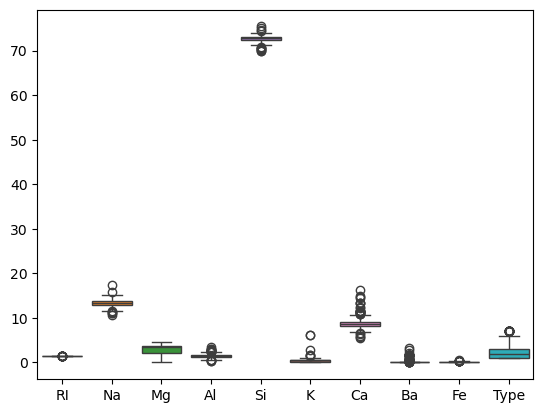

In [20]:
sns.boxplot(df2)

In [21]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<Axes: ylabel='RI'>

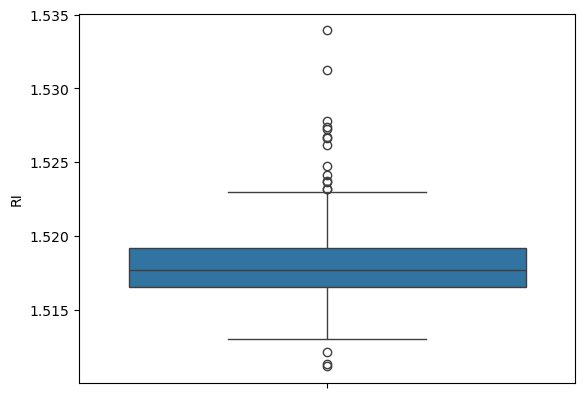

In [22]:
sns.boxplot(df2['RI'])

In [23]:
def Outliers(df,columns):
    for i in columns:
        df[i].astype(int)
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df.loc[(df[i] > upperlimit), i] = upperlimit
        df.loc[(df[i] < lowerlimit), i] = lowerlimit
    return df
cols = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df2 = Outliers(df2,cols)

In [24]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0,6
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0,6
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0,6
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0,6


<Axes: >

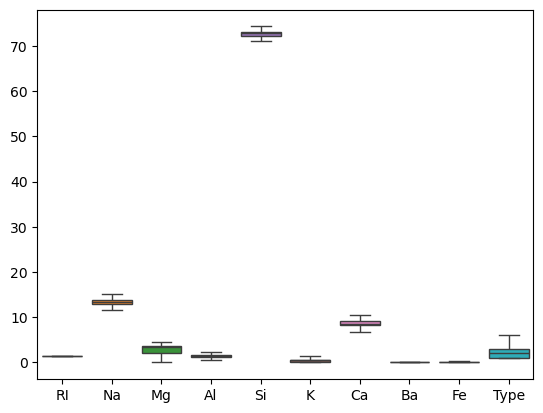

In [25]:
sns.boxplot(df2)

In [27]:
x = df2.drop(columns = 'Type')
y = df2['Type']

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70, test_size = 0.3)

In [32]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [42]:
logic.fit(xtrainscaled,ytrain)
logics = logic.score(xtestscaled,ytest)

In [45]:
dtc.fit(xtrainscaled,ytrain)
dtcs = dtc.score(xtestscaled,ytest)

In [47]:
rfc.fit(xtrainscaled,ytrain)
rfcs = rfc.score(xtestscaled,ytest)

In [48]:
print("Classification Scores:")
print("Logistic Regression Score",logics)
print("Decision Tree Classifier Score",dtcs)
print("Random Forest Classifier Score",rfcs)

Classification Scores:
Logistic Regression Score 0.6923076923076923
Decision Tree Classifier Score 0.7230769230769231
Random Forest Classifier Score 0.8615384615384616
